# Viewing the Action  
Now that we have introduced the IS-LM-IP Model, it is time for us to start analysing its validity and predictive accuracy of this model against real-world data.  In these notes we will be sourcing data from the World Bank data portal, using the _'pandas-datareader'_ API.  By this point in the course, you should be familiar with the libraries we are using, though commenting has been provided throughout to aid students in following the code.  In some cases, proxies will be used for a particular data point, due to the availability of specific data points on the World Bank data portal.  Students interested in running this code on their laptops or personal computers, the graphs take a while to render, so patience is recommended.  If you have limited system resources, it may be best to close out of other RAM intensive applications to prevent your computer from slowing down.  

In [1]:
# import libraries
import numpy as np
from scipy.optimize import fsolve
from scipy.stats import iqr
from scipy import signal
import pandas as pd

import holoviews as hv
import hvplot.pandas

In [2]:
# There is a compatilibility issue with this library \
#and newer versions of Pandas, this is short fix to the problem, \
#if you have issues at this chunk comment it out and you should be fine.  
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.wb as wb

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
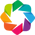

In [3]:
hv.extension('bokeh')
np.random.seed(42)

In this set of notes, we will be comparing the United States to nations involved in the Asian Crisis, like the Philippines, South Korea, Malaysia and Indonesia. You will need a reliable internet connection to download this data.   

In [37]:
# We downloaded the availible countries and 
#  looked up the iso number of the countries we are interested in
countries = wb.get_countries()

selected_countries = countries.loc[countries.name.str.lower().str.contains('malaysia')|
                    countries.name.str.lower().str.contains('philippines')|
                    countries.name.str.lower().str.contains('korea, rep.')|
                    countries.name.str.lower().str.contains('indonesia')|
                    countries.name.str.lower().str.contains('united states'),:]

For students interested at experimenting further with this model and this set of notes, use the indicators DataFrame to search through different economic indicators.  

In [157]:
# We download and select our desired indicators
indicators = wb.get_indicators()

indicators.head()

id                                     name  \
0    1.0.HCount.1.90usd          Poverty Headcount ($1.90 a day)   
1     1.0.HCount.2.5usd          Poverty Headcount ($2.50 a day)   
2  1.0.HCount.Mid10to50    Middle Class ($10-50 a day) Headcount   
3       1.0.HCount.Ofcl  Official Moderate Poverty Rate-National   
4   1.0.HCount.Poor4uds             Poverty Headcount ($4 a day)   

           source                                         sourceNote  \
0  LAC Equity Lab  The poverty headcount index measures the propo...   
1  LAC Equity Lab  The poverty headcount index measures the propo...   
2  LAC Equity Lab  The poverty headcount index measures the propo...   
3  LAC Equity Lab  The poverty headcount index measures the propo...   
4  LAC Equity Lab  The poverty headcount index measures the propo...   

                                  sourceOrganization    topics unit  
0  b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...  Poverty        
1  b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...  Poverty        
2  b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...  Poverty        
3  b'LAC Equity Lab tabulations of data from Nati...  Poverty        
4  b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...  Poverty

To make downloading out data more accessible and more consistent, we will be creating a class, which initialising the set of countries and date range used in the analysis.  Using the _'get_indicators'_ function, you may download a particular indicator and applying various transformations, such as detrending, scaling and interpolation to aid in comparison and interpretability.  

In [44]:
# This time we have created a class to make downloading and 
#  tranforming our data easier and more consistent
class Indicators:
    def __init__(self, country=['USA'], start='1987-01-01 00:00:00', end='1987-01-01 00:00:00'):
        # This class that initialization parameters for use in all downloads
        self.country = country
        self.start = start
        self.end = end
        self.indicator = None
    
    def get_indicator(self, indicator='CM.MKT.TRAD.CD', long=True, detrend=False, scale=True, interpolate=True):
        # We download the data
        self.indicator = wb.download(indicator=indicator, 
                                    country=self.country, 
                                    start=self.start, 
                                    end=self.end)        
        # reshape it
        self.indicator = self.indicator.reset_index().iloc[::-1,:].reset_index(drop=True) if long else self.indicator
        self.indicator = self.indicator.rename(index=str, columns={indicator: indicators.loc[indicators.id == indicator,'name'].tolist()[0]})
        indicator = indicators.loc[indicators.id == indicator,'name'].tolist()[0]
        
        # and if required, interpolate missing data
        self.indicator.loc[:,indicator] = self.indicator.groupby('country')[indicator]\
        .apply(lambda x: pd.Series(x).interpolate()) if interpolate else self.indicator
        
        # detrend the data
        self.indicator.loc[:,indicator] = self.indicator.groupby('country')[indicator]\
        .apply(lambda x: pd.Series(signal.detrend(x))).reset_index().iloc[:,2].values if detrend else self.indicator
        
        # scale the data
        self.indicator.loc[:,indicator] = self.indicator.groupby('country')[indicator]\
        .apply(lambda x: (x-x.iloc[0])/iqr(x)) if scale else self.indicator
        
        # convert the data for easier use
        self.indicator.year = pd.to_numeric(self.indicator.year)
        
        return self.indicator

In [45]:
# we initialize our class with our countries and dates
Country_Indicators = Indicators(country=selected_countries.iso3c.tolist(), start=pd.to_datetime('1987', yearfirst=True), end=pd.to_datetime('2007', yearfirst=True))

# we have created a simple helped function 
#  to mark when the crisis takes place
line = hv.VLine(1997).options(color='black', line_width=2)

In the run-up to the Asian Crisis, changes in western macroeconomic policy sent shockwaves throughout Asia. The Plaza Accord of 1985 led to the strong devaluation of the Chinese renminbi and the Japanese yen against the USD. This changed the investment climate in the region dramatically. The 1980s saw a massive appreciation of the US dollar against the renminbi and yen, making competition increasingly hard for American manufacturers. Following lobbying by US manufacturers, the protectionist policies of the Plaza Accords sought to alter US free-market policy radically. From 1985 to 1987, the US dollar declined by 51% against the yen – creating the incentive for the expansionary monetary policies that led to the Japanese asset price bubble of the late 1980s and the 'Lost Decade' in Japan. 
  
For fledging nations in Southeast Asia, emerging through rapid liberalization, urbanization and industrialization, the ability to attract foreign direct investment was paramount. In this graph, you can see the rising inflows of real foreign direct investment over the period and compare and contrast these changes against other countries used in these notes. 
 
 

In [143]:
%%opts Curve [width=600, height=450]
investment = Indicators(country=selected_countries.iso3c.tolist(), 
                        start=pd.to_datetime('1981', yearfirst=True), 
                        end=pd.to_datetime('2007', yearfirst=True))\
                        .get_indicator(indicator='BX.KLT.DINV.CD.WD', scale=True)

facet = investment.hvplot.line(x='year', by='country')*line
facet.cols(1)

:Overlay
   .NdOverlay.I :NdOverlay   [country]
      :Curve   [year]   (Foreign direct investment, net inflows (BoP, current US$))
   .VLine.I     :VLine   [x,y]

Indonesia, under Suharto, was a huge proponent of foreign direct investment, and it was generally believed that by controlling the exchange rate risk of foreign investors, they would be able to increase investment, growth and development in the country. In the graph, you can see the scaled real foreign direct investment, and its meteoric rise in Indonesia from the period 1981 to 1997. While we see similar increases in neighbouring countries, like Malaysia, it is not nearly as dramatic in its rise and collapse. The primary driver of these differences was around interest rates. 
 
One major attraction for investors, given the fixed exchange rate, were the high real interest rates offered in Indonesia, Malaysia and the Philippines. Investors would borrow in the United States, exchange for Indonesian rupiah, and invest in government and commercial bonds or fixed-income assets, without the uncertainties of exchange rate depreciation when the bond reached maturity.  
 
For the Indonesian government, the ability to maintain the exchange rate was crucial, as when bonds reached maturity investors would want to exchange their rupiah for dollars to realize their investment. This exchange meant the government needed sufficient reserves to allow a transaction to take place without having to alter the exchange rate. Since exchange rates are fixed, the government would need to sell domestic currency and buy foreign currency, thereby raising the money supply, to shift the LM curve back to its original position. 
 
In this graph, we see that while broad money supply declined in the United States, it increased dramatically in Southeast Asia, as well as in South Korea, over the period 1987 to 1997. According to the Liquidity-Money Relationship, to keep interest rates constant, given increasing GDP, real money supply must increase to meet the growing demand for money in the economy. By stabilising real interest rates and increasing the money supply, banks sought to stabilise the bond markets to protect the investors by controlling exchange rates to maintain economic growth. 

In [145]:
%%opts Curve [width=600, height=350]
money = Country_Indicators.get_indicator(indicator='FM.LBL.BMNY.GD.ZS')
money.hvplot.line(x='year', by='country')*line

:Overlay
   .NdOverlay.I :NdOverlay   [country]
      :Curve   [year]   (Broad money (% of GDP))
   .VLine.I     :VLine   [x,y]

In this graph, you can see the real interest rates in several Asian countries against the United States over the period 1987 to 2007 to analyze the build-up to the crisis. While government interest payments as a percent of revenue appear to decline due to growing real GDP, and growing tax bases, in the region these interest payments quickly revert, sending real interest rates and real GDP crashing.   

In [154]:
%%opts Curve [width=400, height=350]
interest = Country_Indicators.get_indicator(indicator='FR.INR.RINR', scale=False)
govtinterestpayment = Country_Indicators.get_indicator(indicator='GC.XPN.INTP.RV.ZS', scale=True)
gdp = Country_Indicators.get_indicator(indicator='NY.GDP.PCAP.CD', scale=True)


facet = interest.hvplot.line(x='year', by='country')*line +\
        govtinterestpayment.hvplot.line(x='year', by='country')*line +\
        gdp.hvplot.line(x='year', by='country')*line 
facet.cols(3)

/home/marcussky/anaconda3/envs/tulip/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


:Layout
   .Overlay.I   :Overlay
      .NdOverlay.I :NdOverlay   [country]
         :Curve   [year]   (Real interest rate (%))
      .VLine.I     :VLine   [x,y]
   .Overlay.II  :Overlay
      .NdOverlay.I :NdOverlay   [country]
         :Curve   [year]   (Interest payments (% of revenue))
      .VLine.I     :VLine   [x,y]
   .Overlay.III :Overlay
      .NdOverlay.I :NdOverlay   [country]
         :Curve   [year]   (GDP per capita (current US$))
      .VLine.I     :VLine   [x,y]

Eventually, without any remaining foreign currency reserves and with dangerously highinterest rates, these Asian nations were forced to let their currencies float. In these graphs, you can observe the official exchange rate, foreign exchange reserves and current account balance for these nations before and after the crisis. While this betrayed much of the investors in the country at the time, it did appear to stabilize the country’s monetary system, allowing it to meet the changing needs of the economy at the time. 

In [190]:
%%opts Curve [width=400, height=350]
exchange = Country_Indicators.get_indicator(indicator='PA.NUS.FCRF').dropna()
reserves = Country_Indicators.get_indicator(indicator='BN.RES.INCL.CD').dropna()
netexports = Country_Indicators.get_indicator(indicator='BN.CAB.XOKA.CD').dropna()

facet = exchange.hvplot.line(x='year', by='country')*line  +\
        reserves.hvplot.line(x='year', by='country')*line  +\
        netexports.hvplot.line(x='year', by='country')*line 
facet.cols(3)

:Layout
   .Overlay.I   :Overlay
      .NdOverlay.I :NdOverlay   [country]
         :Curve   [year]   (Official exchange rate (LCU per US$, period average))
      .VLine.I     :VLine   [x,y]
   .Overlay.II  :Overlay
      .NdOverlay.I :NdOverlay   [country]
         :Curve   [year]   (Reserves and related items (BoP, current US$))
      .VLine.I     :VLine   [x,y]
   .Overlay.III :Overlay
      .NdOverlay.I :NdOverlay   [country]
         :Curve   [year]   (Current account balance (BoP, current US$))
      .VLine.I     :VLine   [x,y]

Using this data, we are going to try to model these forces using the IS-LM-IP model on real output and exchange rates. Using board money as an exogenous determinant in the LM Relationship, and real direct foreign investment, real government expenditure and real consumption as exogenous determinants of the IS Relationship, we will analyze how these curves shift to examining their effect on real output and the exchange rate. Ideally, broad money would be replaced with M0 or M1 money in this model, but as this is not available, we will use M4 money. Using the sliders, you can select a country and move through time to see how well the model tracks the indicator. While this money lacks all possible contributors to economic shifts, it does provide strong levels of explainability to the chaos of markets at the time. 

In [68]:
# this function prives us our range 
#  of real interest rate values
def i(*args, **kwargs):
    i = np.linspace(-6, 6, 100).reshape(-1,1)
    i = i[i!=0]
    return i

# These define our IS-LM-IP equations
def IS(i=i(), Z_1=0, df=True):
    return pd.DataFrame([i, -i+Z_1], index=['Real Interest','Real Output']).T if df else -i+Z_1

def LM(i=i(), Z_2=0, df=True):
    return pd.DataFrame([i, i-Z_2], index=['Real Interest','Real Output']).T if df else i-Z_2

def IP(i=i(), Z_3=0, df=True):
    return pd.DataFrame([i, i-Z_3], index=['Real Interest','Exchange Rate']).T if df else i-Z_3

# This equation is used to find the Price-level and Real Output from our graphs
def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

In [184]:
## Lets get some data

# z_1
gov = Country_Indicators.get_indicator(indicator='NE.CON.GOVT.CD', scale=False)
cons = Country_Indicators.get_indicator(indicator='NE.CON.TOTL.CD', scale=False)
netexports = Country_Indicators.get_indicator(indicator='BN.CAB.XOKA.CD', scale=False)

Z_1 = gov.loc[:,['year','country']]

Z_1['Z_1']  = pd.DataFrame(gov.drop(columns=['year','country']).iloc[:,0] +\
                    cons.drop(columns=['year','country']).iloc[:,0] -\
                    netexports.drop(columns=['year','country']).iloc[:,0], columns=['Z_1'])
Z_1.loc[:,'Z_1'] = Z_1.groupby('country')['Z_1'].apply(lambda x: (x-x.iloc[0])/iqr(x)) 

# z_2
money = Country_Indicators.get_indicator(indicator='FM.LBL.BMNY.GD.ZS')

# response variables
exchange = Country_Indicators.get_indicator(indicator='PA.NUS.FCRF').fillna(0)
gdp = Country_Indicators.get_indicator(indicator='NY.GDP.PCAP.CD', detrend=True)

# independent varable
interest = Country_Indicators.get_indicator(indicator='FR.INR.RINR', scale=False)

In [186]:
# Using this function we will produce our plots
def IS_LM_IP(country='United States', year=1987):  
    z_1 = Z_1.loc[(Z_1.year==year)&(Z_1.country==country),:].drop(columns=['year','country']).iloc[0,0]
    z_2= money.loc[(money.year==year)&(money.country==country),:].drop(columns=['year','country']).iloc[0,0]
    z_3=0
    
    is_eq = IS(i(), Z_1=0)
    lm_eq = LM(i(),Z_2=0)
    ip_eq = IP(i(), Z_3=0)
    
    is_shock = IS(i(), Z_1=z_1)
    lm_shock = LM(i(), Z_2=z_2)
    ip_shock = IP(i(), Z_3=z_3)
    
    result = findIntersection(lambda x: LM(i=x, Z_2=z_2, df=False), lambda x: IS(i=x, Z_1=z_1, df=False), 0.0)
    result = result + 1e-4 if result==0 else result
    
    is_lm_plot = hv.Curve(lm_eq, vdims='Real Interest',kdims='Real Output').options(alpha=0.2, color='#1BB3F5') *\
            hv.Curve(is_eq, vdims='Real Interest',kdims='Real Output').options(alpha=0.2, color='orange') *\
            hv.Curve(lm_shock, vdims='Real Interest',kdims='Real Output', label='LM').options(color='#1BB3F5') *\
            hv.Curve(is_shock, vdims='Real Interest',kdims='Real Output', label='IS').options(alpha=1, color='orange') *\
            hv.VLine(LM(i=result[0], Z_2=z_2, df=False)).options(color='black', alpha=0.2, line_width=1) *\
            hv.HLine(result[0]).options(color='black', alpha=0.2, line_width=1)
    
    ip_plot = hv.Curve(ip_eq, vdims='Real Interest',kdims='Exchange Rate').options(alpha=0.2, color='#33CC00') *\
            hv.Curve(ip_shock, vdims='Real Interest',kdims='Exchange Rate', label='IP').options(color='#33CC00') *\
            hv.VLine(IP(i=result[0], Z_3=z_3, df=False)).options(color='black', alpha=0.2, line_width=1) *\
            hv.HLine(result[0]).options(color='black', alpha=0.2, line_width=1)
    
    exchange_plot = exchange.loc[exchange.country==country].hvplot.line(x='year', by='country') *\
    hv.VLine(year) * pd.DataFrame([[year,0.5*IP(i=result[0], Z_3=z_3, df=False)]], 
                                  columns=['year','Exchange Rate']).hvplot.scatter(x='year', color='red')
    
    gdp_plot = gdp.loc[gdp.country==country].hvplot.line(x='year', by='country') *\
    hv.VLine(year) * pd.DataFrame([[year,0.5*LM(i=result[0], Z_2=z_2, df=False)]], 
                                   columns=['year','Real GDP']).hvplot.scatter(x='year', color='red')

    facet = is_lm_plot + ip_plot + gdp_plot + exchange_plot
    
    return facet.cols(2)

In [187]:
is_lm_ip_dict = {(c,y):IS_LM_IP(c,y) 
                 for c in countries.loc[countries.iso3c.isin(Country_Indicators.country),'name'].tolist() 
                 for y in range(Country_Indicators.start.year,Country_Indicators.end.year)}

hmap = hv.HoloMap(is_lm_ip_dict, kdims=['country', 'year']).collate()

In [188]:
%%opts Curve [width=400, height=250]

hmap

:Layout
   .Overlay.I   :HoloMap   [country,year]
      :Overlay
         .Curve.I  :Curve   [Real Output]   (Real Interest)
         .Curve.II :Curve   [Real Output]   (Real Interest)
         .Curve.LM :Curve   [Real Output]   (Real Interest)
         .Curve.IS :Curve   [Real Output]   (Real Interest)
         .VLine.I  :VLine   [x,y]
         .HLine.I  :HLine   [x,y]
   .Overlay.II  :HoloMap   [country,year]
      :Overlay
         .Curve.I  :Curve   [Exchange Rate]   (Real Interest)
         .Curve.IP :Curve   [Exchange Rate]   (Real Interest)
         .VLine.I  :VLine   [x,y]
         .HLine.I  :HLine   [x,y]
   .Overlay.III :HoloMap   [country,year]
      :Overlay
         .NdOverlay.I :NdOverlay   [country]
            :Curve   [year]   (GDP per capita (current US$))
         .VLine.I     :VLine   [x,y]
         .Scatter.I   :Scatter   [year]   (Real GDP)
   .Overlay.IV  :HoloMap   [country,year]
      :Overlay
         .NdOverlay.I :NdOverlay   [country]
            :Curve   [year]   (Official exchange rate (LCU per US$, period average))
         .VLine.I     :VLine   [x,y]
         .Scatter.I   :Scatter   [year]   (Exchange Rate)

Important to note in the movement of the IP curve are anticipated real interest rates and exchange rates. These two variables serve to shift the IP curve but are not directly observed in the model. In order to use this model in practice, we would need to accurately calibrate the coefficients on our variables and determine the elasticity of the variables. 